In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df =pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df["total_spend"] = df["TV"]+ df["radio"]+df["newspaper"]
df["total_spend"]

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

<Axes: xlabel='total_spend', ylabel='sales'>

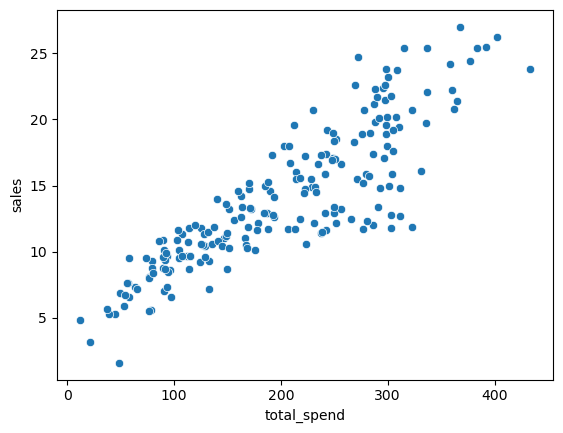

In [4]:
sns.scatterplot(data = df, x = "total_spend",y = "sales")

<Axes: xlabel='total_spend', ylabel='sales'>

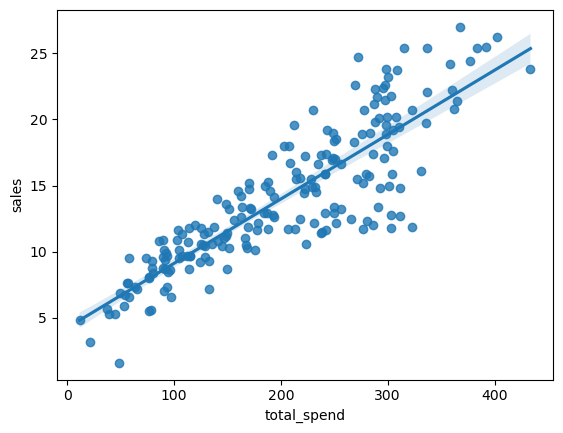

In [5]:
sns.regplot(data = df, x = "total_spend",y = "sales")

In [6]:
X = df["total_spend"]
y = df["sales"]

In [7]:
#y = mx + b
#y = B1x + B0
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

In [8]:
potential_spend = np.linspace(0,500,100)

In [9]:
predicted_sales = (0.04868788*potential_spend)+4.24302822

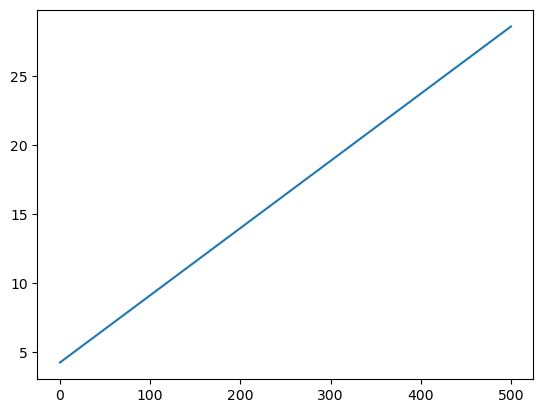

In [10]:
plt.plot(potential_spend, predicted_sales)

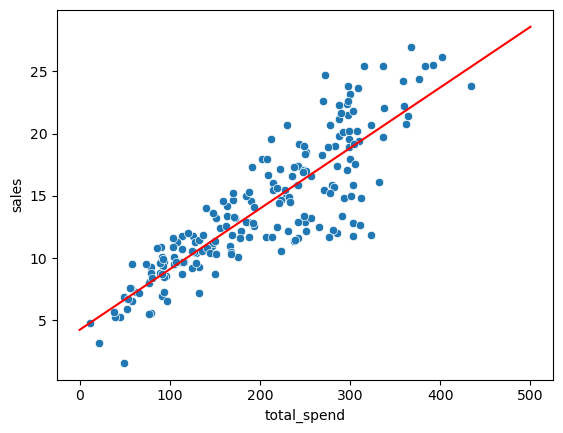

In [11]:
sns.scatterplot(data = df, x = "total_spend",y = "sales")
plt.plot(potential_spend, predicted_sales, color = "red")

In [12]:
spend = 200
predicted_sales = (0.04868788*spend) + 4.24302822
print(predicted_sales)

13.98060422


In [13]:
#y = B3 x**3 + B2x**2 + B1x + B0
np.polyfit(X, y, deg = 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [14]:
pot_spend = np.linspace(0,500,100)

In [15]:
predicted_sales = (3.07615033e-07*pot_spend**3) + (-1.89392449e-04*pot_spend**2) + (8.20886302e-02*pot_spend) + 2.70495053e+00 

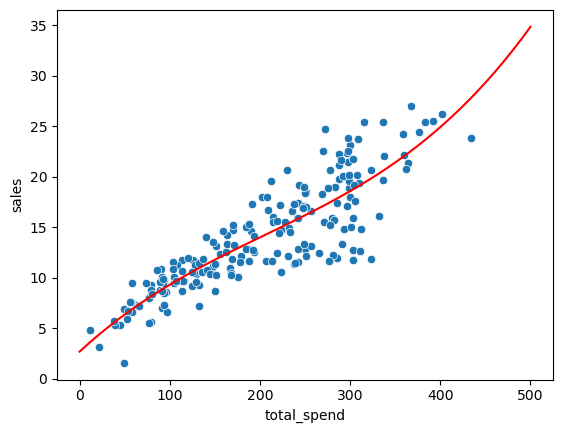

In [16]:
sns.scatterplot(data  =df, x = "total_spend",y = "sales")
plt.plot(pot_spend, predicted_sales, color = "red");

Text(0, 0.5, 'sales')

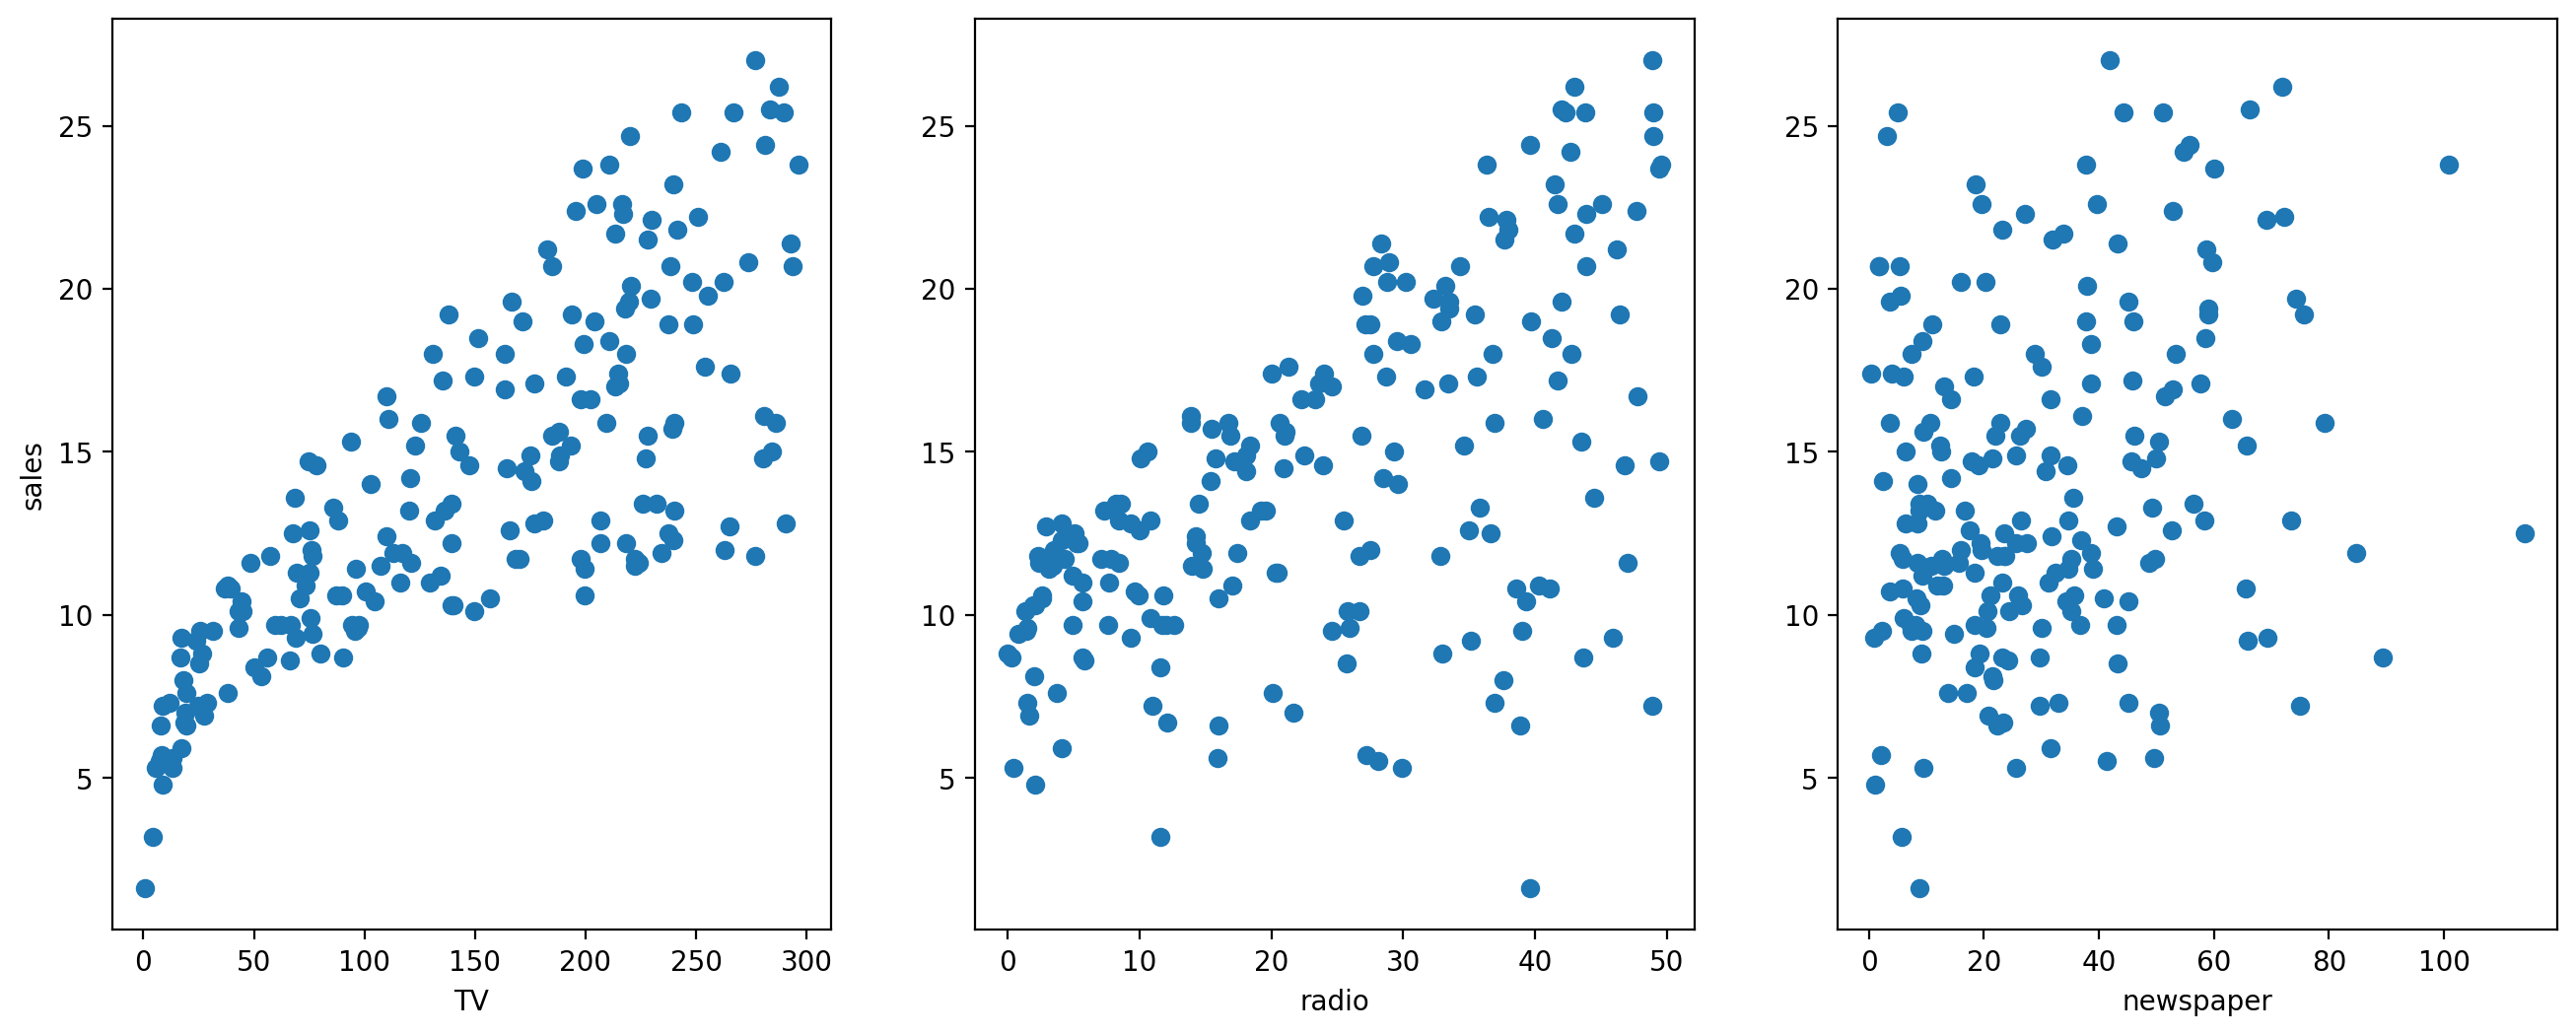

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, dpi = 200, figsize = (16,6))

axes[0].plot(df["TV"],df["sales"], 'o')
axes[0].set_xlabel("TV")
axes[0].set_ylabel("sales")

axes[1].plot(df["radio"],df["sales"], 'o')
axes[1].set_xlabel("radio")
axes[0].set_ylabel("sales")

axes[2].plot(df["newspaper"],df["sales"], 'o')
axes[2].set_xlabel("newspaper")
axes[0].set_ylabel("sales")


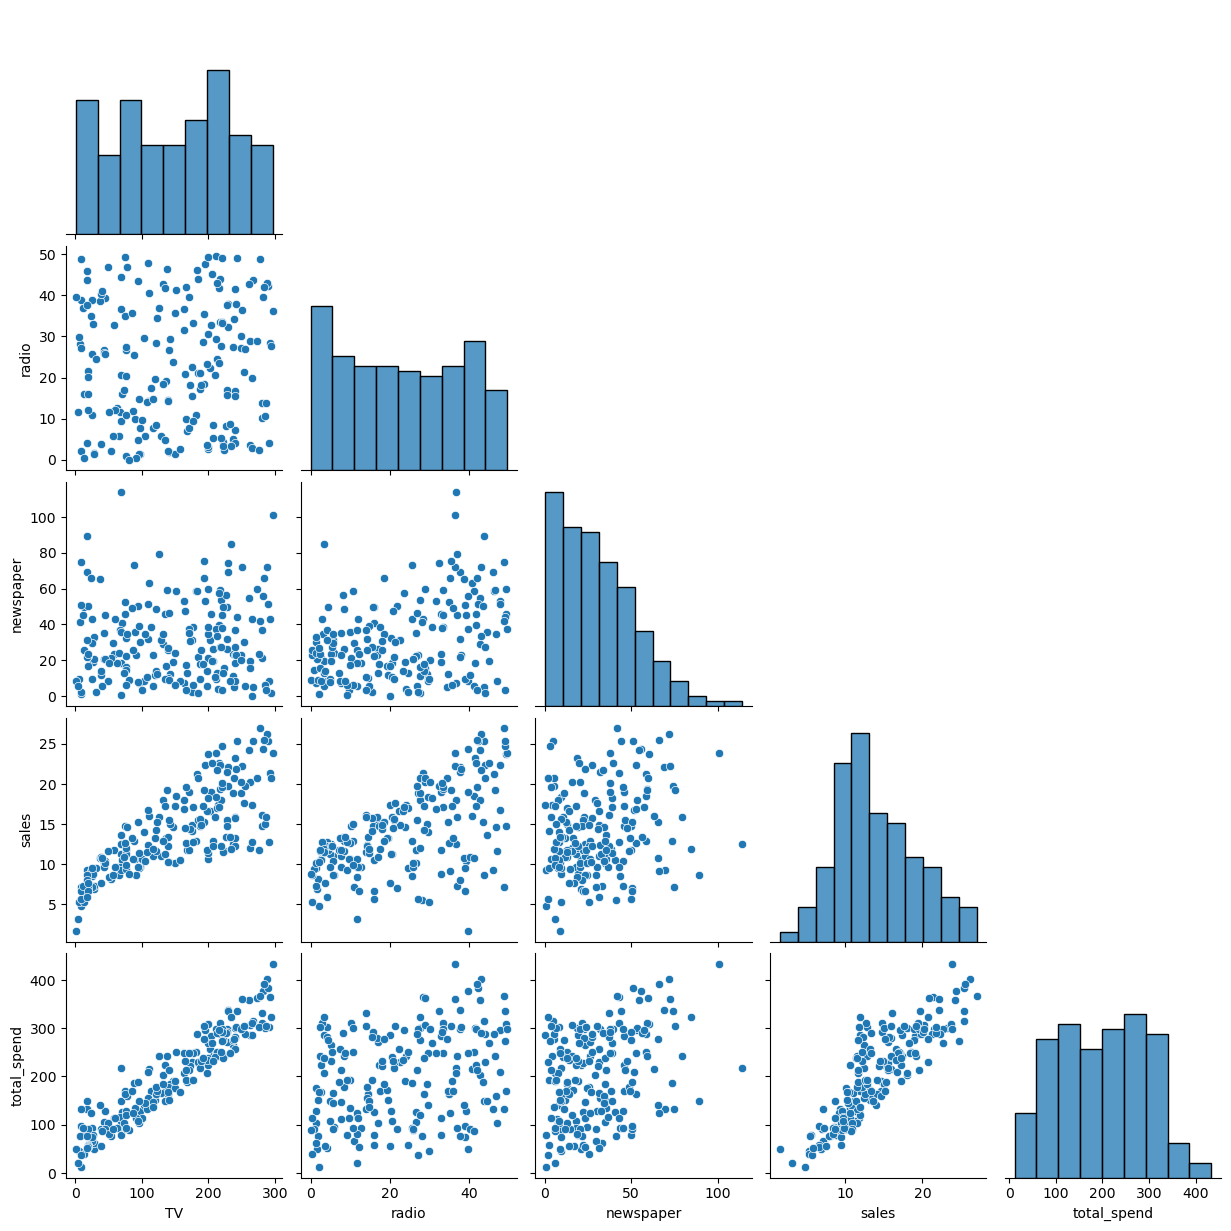

In [18]:
sns.pairplot(df, corner = True)

In [19]:
X = df.drop(["sales","total_spend"], axis = 1)

In [20]:
y = df["sales"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [24]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [25]:
model.score(X_test,y_test)

0.9185780903322446

In [26]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [27]:
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
df["sales"].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

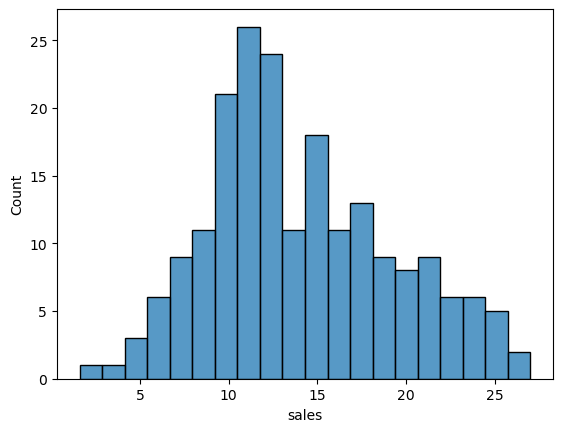

In [30]:
sns.histplot(data = df, x = "sales", bins = 20)

In [31]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144803

In [32]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388

In [33]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Residual Plots

In [34]:
test_residuals = y_test - test_predictions

In [35]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

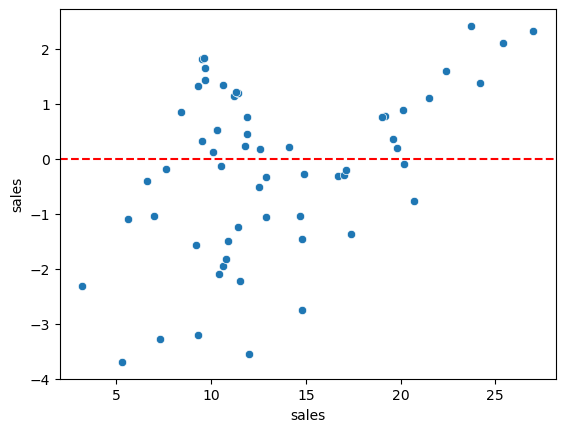

In [36]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = "r",ls = "--")

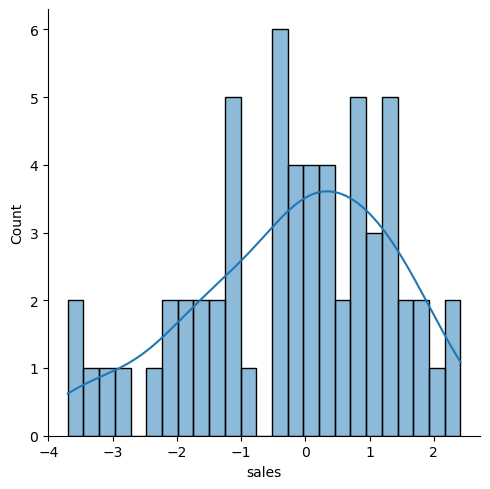

In [37]:
 sns.displot(test_residuals, bins = 25, kde =True);

In [38]:
import scipy as sp

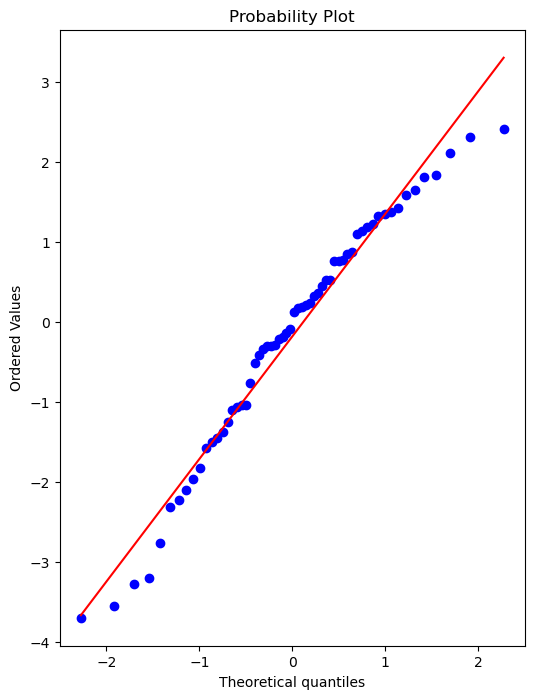

In [39]:
#Create a figure and axis to plot on
fig, ax = plt.subplots(figsize =(6,8), dpi = 100)

#probplot returns the raw values if needed
#we just want to see the plot, so we assign these values to _

_ = sp.stats.probplot(test_residuals, plot =ax)

In [40]:
final_model = LinearRegression()

In [41]:
final_model.fit(X,y)

LinearRegression()

In [42]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [43]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [44]:
y_hat = final_model.predict(X)

In [45]:
from joblib import dump, load

In [46]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [47]:
loaded_model = load('final_sales_model.joblib')

In [48]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
X.shape

(200, 3)

In [50]:
#149 TV, 22 Radio, 12 Newspaper
#Sales?
campaign = [[149, 22, 12]]

In [51]:
loaded_model.predict(campaign)

C:\Users\chukw\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

<Axes: xlabel='newspaper', ylabel='TV'>

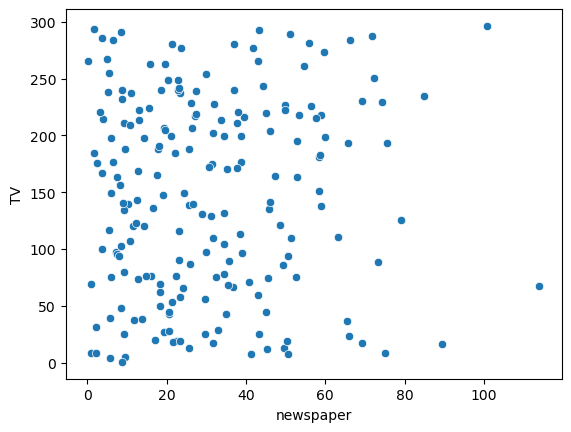

In [52]:
sns.scatterplot(data = df, x = "newspaper" , y = "TV")

<Axes: xlabel='radio', ylabel='TV'>

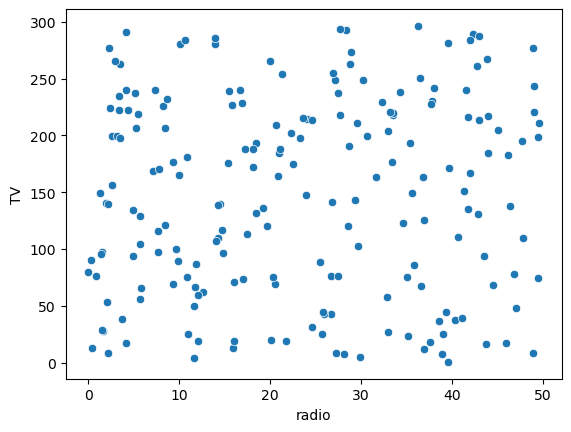

In [53]:
sns.scatterplot(data = df, x = "radio" , y = "TV")

<Axes: xlabel='newspaper', ylabel='radio'>

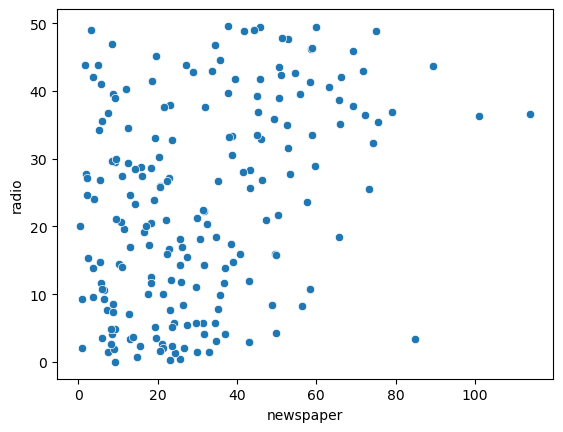

In [54]:
sns.scatterplot(data = df, x = "newspaper" , y = "radio")